In [2]:
import numpy as np
import matplotlib.pyplot as plt
from modules.stats import *
from modules.helper_functions import plot_pretty
import astropy.stats.bayesian_blocks as astr_bayesian_blocks
from scipy.stats import gaussian_kde

In [2]:
# generate random points that is uniformly spherically and radially
# phi = np.random.uniform(size=10000)*2*np.pi
# theta = np.random.uniform(size=10000)*np.pi
# r = np.random.uniform(size=10000)


# x = r * np.cos(phi) * np.sin(theta)
# y = r * np.sin(phi) * np.sin(theta)
# z = r * np.cos(theta)

# pos = np.array([x,y,z]).T

# print(get_smallest_rms(pos, num_random_points = 10000))

In [3]:
# def gen_dist(size = 1):
#     return np.random.rand(size)**(1/3)

In [4]:
# plot_pretty()

The theoretical value of the rms is $\frac{1}{2\sqrt{3}}\approx 0.28867$.

In [5]:
# print(get_smallest_rms(pos, num_random_points = 10000)[1])
# print(get_smallest_rms(pos, isRemovingOutliers = True, num_random_points = 10000)[1])

# rmss = []
# rmss_uniform_dense = []
# iterations = 100000
# num_chosen_subhalos = 11

# for _ in range(iterations):
#     phi = np.random.uniform(size=num_chosen_subhalos)*2*np.pi
#     theta = np.random.uniform(size=num_chosen_subhalos)*np.pi
#     r = np.random.uniform(size=num_chosen_subhalos)
#     r_uniform_dense = gen_dist(size=num_chosen_subhalos)


#     x = r * np.cos(phi) * np.sin(theta)
#     y = r * np.sin(phi) * np.sin(theta)
#     z = r * np.cos(theta)
    
#     x_uniform_dense = r_uniform_dense * np.cos(phi) * np.sin(theta)
#     y_uniform_dense = r_uniform_dense * np.sin(phi) * np.sin(theta)
#     z_uniform_dense = r_uniform_dense * np.cos(theta)

#     pos = np.array([x,y,z]).T
#     pos_uniform_dense = np.array([x_uniform_dense,y_uniform_dense,z_uniform_dense]).T
#     r_med = np.median(r)
#     r_med_uniform_dense = np.median(r_uniform_dense)
    
#     rms = get_smallest_rms(pos, num_random_points = 10000)
#     rms_uniform_dense = get_smallest_rms(pos_uniform_dense, num_random_points = 10000)
    
#     rmss.append(rms/r_med)
#     rmss_uniform_dense.append(rms_uniform_dense/r_med_uniform_dense)
    
# # print(rmss)

In [6]:
# kernel = gaussian_kde(rmss)
# kernel_uniform_dense = gaussian_kde(rmss_uniform_dense)

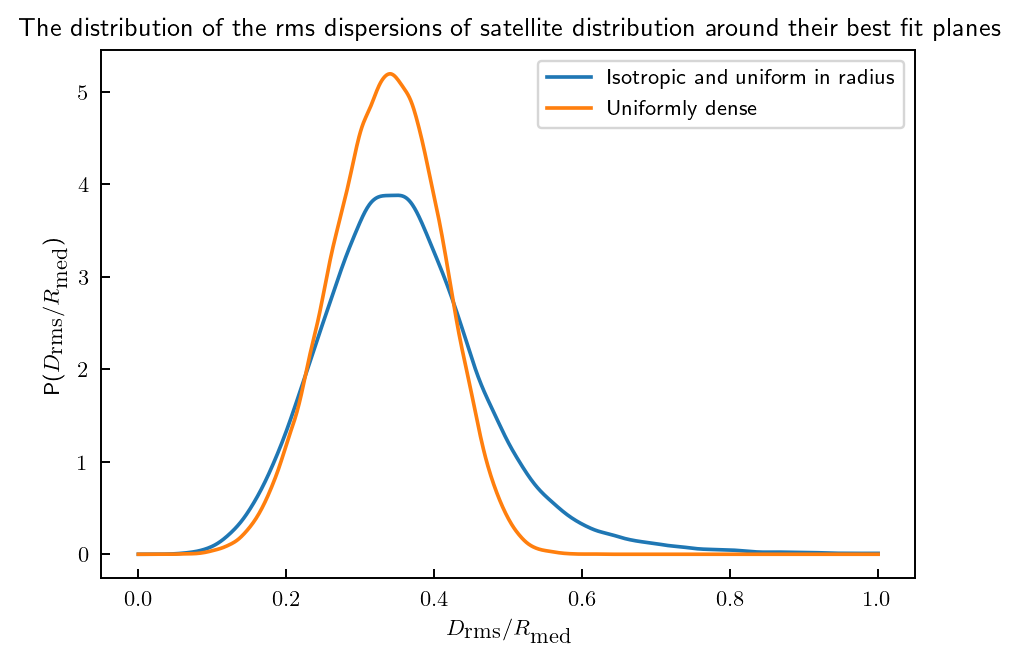

In [7]:
# x = np.linspace(0, 1, num = 1000)
# fig, ax = plt.subplots()
# ax.plot(x, kernel(x), label="Isotropic and uniform in radius")
# ax.plot(x, kernel_uniform_dense(x), label="Uniformly dense")
# ax.set_title('The distribution of the rms dispersions of satellite distribution around their best fit planes')
# ax.set_xlabel('$D_{\\textrm{rms}}/R_{\\textrm{med}}$')
# ax.set_ylabel('P($D_{\\textrm{rms}}/R_{\\textrm{med}}$)')
# ax.legend()
# plt.savefig("../../result/data/theoretical_distribution.pdf")

In [4]:
pos = np.random.rand(10000, 3)
print(get_smallest_rms(pos, num_random_points = 10000))

0.28663550678465494
